

# Portfolio Management-Eigen Portfolio

In this case study we use dimensionality reduction techniques for portfolio management and allocation.


Reference: [1] Tatsat, Hariom, Sahil Puri, and Brad Lookabaugh. Machine Learning and Data Science Blueprints for Finance. O'Reilly Media, Incorporated, 2020.

## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Looking at Portfolio weights](#4.2.2)
        * [5.2.3. Finding the Best Eigen Portfolio](#4.2.3)
        * [5.2.4. Backtesting Eigenportfolio](#4.2.4)

<a id='0'></a>
# 1. Problem Definition

Our goal in this case study is to maximize risk-adjusted returns using dimensionality
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes.

The dataset used for this case study is Dow Jones Industrial Average (DJIA) index and
its respective 30 stocks from year 2000-2017. The dataset can be downloaded from
yahoo finance.


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# load dataset
dataset = read_csv('Dow_adjcloses_2000_2017.csv',index_col=0)

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [6]:
# shape
dataset.shape

(4528, 30)

In [7]:
# peek at data
set_option('display.width', 100)
dataset.head(3)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.52222,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.89986,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.78155,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421


In [8]:
# types
set_option('display.max_rows', 500)
# dataset.dtypes

In [9]:
# describe data
set_option('precision', 3)
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,87.000,...,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,2465.000,4528.000,4528.000
mean,79.444,46.591,40.824,69.771,51.553,58.333,20.320,23.773,42.640,68.332,...,20.715,19.649,48.026,51.525,58.335,53.254,25.733,44.440,48.273,39.992
std,46.247,19.358,44.589,48.126,28.378,29.387,8.739,9.673,29.883,2.153,...,17.533,6.348,18.610,30.471,29.406,44.853,10.672,27.972,14.049,19.208
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,61.620,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,49.438,33.434,3.484,36.192,25.666,28.221,14.751,15.203,21.631,68.020,...,7.705,14.839,34.932,29.415,33.540,22.634,17.258,18.473,37.813,27.371
50%,60.891,40.834,20.687,56.646,51.219,54.888,18.138,19.850,29.050,68.988,...,13.088,17.862,45.796,38.892,53.776,41.724,20.848,37.958,42.218,31.621
75%,97.710,59.393,71.059,89.976,73.265,86.010,22.861,32.890,58.913,69.616,...,29.682,24.000,64.634,73.367,82.736,60.697,37.335,68.023,62.462,44.243
max,236.889,97.873,173.813,292.090,153.954,121.340,63.698,45.469,115.471,71.251,...,64.619,35.615,89.752,132.553,125.350,225.140,50.478,113.600,97.095,90.188


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

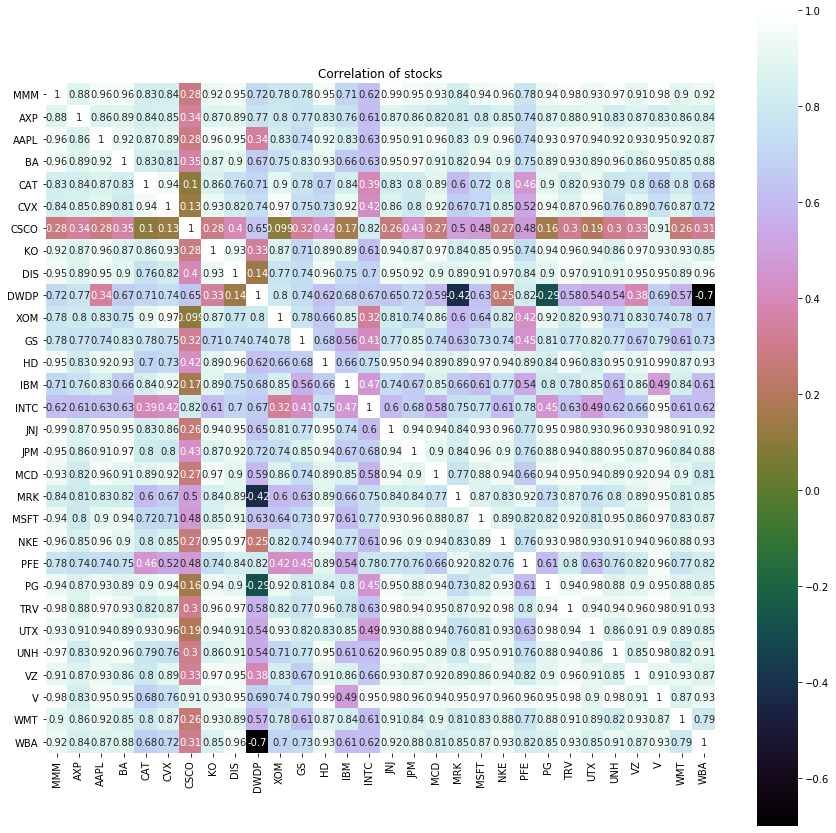

In [23]:
# plot a correlation matrix
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title("Correlation of stocks")
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the chart above, there is a significant positive correlation between
the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [38]:
dataset.isnull()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-04,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-05,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-06,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-07,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-12-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-12-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any()) # 'any' returns true if there are any True values

Null Values = True


In [75]:
# Getting rid of the columns with more than 30% missing values. 
# indices_to_drop = []
# for i, drop in enumerate(dataset.isnull().mean()):
#     if (drop>0.3):
#         indices_to_drop.append(i)

# # tuple(indices_to_drop)

djia_data = dataset.copy()

missing_proportions = dataset.isnull().mean()
missing_proportions = missing_proportions[missing_proportions > 0.3]

cols_to_drop = list(missing_proportions.index)
djia_data.drop(labels=cols_to_drop, axis=1, inplace=True)
djia_data.shape



(4528, 28)

In [76]:
djia_data.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,23.862,...,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,23.405,...,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,24.569,...,37.235,4.702,16.416,31.326,20.086,20.255,5.753,22.564,44.503,21.097
2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,25.959,...,35.989,4.678,16.973,32.438,20.122,20.998,5.964,22.449,45.127,20.527
2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,25.883,...,36.460,4.678,18.123,35.024,20.922,21.831,6.663,22.283,48.535,21.052


Given that there are null values drop the rows contianing the null values.

In [77]:
# Fill the missing values with the previous available value.
djia_data = djia_data.fillna(method='ffill')

In [78]:
# Drop the rows containing NA
djia_data = djia_data.dropna(axis=0)

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.65,14.561,21.582,43.004,16.984,23.522,NaN,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.61,14.372,21.582,40.577,17.041,24.900,NaN,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907


Computing Daily Return

In [89]:
# Daily Linear Returns (%)
djia_returns = djia_data.pct_change(periods=1)
djia_returns.dropna(axis=0, inplace=True)
djia_returns.head()


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.040,-0.038,-0.084,-0.001,-0.013,0.000,-0.056,0.003,0.059,-0.019,...,-0.034,-0.054,-0.037,-0.020,-0.013,-0.041,-0.013,-0.032,-0.037,-0.037
2000-01-05,0.051,-0.005,0.015,0.070,0.038,0.022,0.008,0.011,0.035,0.050,...,0.011,0.058,0.018,-0.009,0.010,-0.009,-0.002,0.033,-0.023,0.009
2000-01-06,0.058,0.000,-0.087,0.003,0.037,0.039,-0.027,-0.001,-0.034,0.057,...,-0.033,-0.005,0.034,0.036,0.002,0.037,0.037,-0.005,0.014,-0.027
2000-01-07,0.020,0.014,0.047,0.029,0.033,0.018,0.059,0.066,-0.016,-0.003,...,0.013,0.000,0.068,0.080,0.040,0.040,0.117,-0.007,0.076,0.026
2000-01-10,-0.005,0.014,-0.018,-0.014,-0.033,-0.027,0.037,-0.032,0.153,-0.014,...,0.007,0.017,-0.002,-0.005,-0.018,0.010,-0.017,-0.005,-0.018,0.029


In [90]:
# Remove Outliers beyond 3 standard deviations

djia_returns = djia_returns[djia_returns.apply(lambda x :(x-x.mean()).abs()<(3*x.std())).all(axis=1)]

In [91]:
djia_returns.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-0.018,0.009,-0.051,-0.016,-0.016,-0.009,-3.005e-02,0.034,0.010,0.012,...,-0.026,0.050,-0.002,0.016,-0.011,-0.023,0.002,-0.009,-0.015,0.040
2000-01-20,-0.037,0.017,0.065,-0.024,-0.044,-0.005,8.905e-04,0.010,-0.032,-0.022,...,-0.009,-0.024,-0.016,-0.024,-0.005,-0.023,0.025,0.003,-0.011,0.000
2000-02-02,-0.017,-0.028,-0.014,0.020,0.006,-0.007,-3.311e-02,-0.030,0.035,0.007,...,-0.021,0.016,-0.027,-0.009,-0.049,0.001,0.026,-0.004,-0.005,0.005
2000-02-03,-0.009,-0.008,0.046,-0.027,-0.026,-0.014,3.424e-02,-0.020,0.017,-0.017,...,0.028,0.009,-0.010,-0.008,-0.045,-0.015,-0.009,-0.015,0.000,-0.002
2000-02-04,-0.029,-0.009,0.045,0.013,0.000,-0.035,2.801e-02,0.018,0.007,-0.018,...,0.028,-0.025,0.003,-0.031,0.005,-0.029,0.025,0.002,-0.035,0.011


<a id='3.2'></a>
## 4.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes to a standard Normal distribution with a mean of
0 and a standard deviation of 1.

In [92]:
from sklearn.preprocessing import StandardScaler

# Standardization 
scaler = StandardScaler()
scaler.fit(djia_returns)
scaled_djia_returns = scaler.fit_transform(djia_returns)

scaled_djia_returns = pd.DataFrame(scaled_djia_returns, columns=djia_data.columns, index=djia_returns.index)
scaled_djia_returns.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.725,0.558,-2.681,-1.137,-1.045,-0.783,-1.805,3.542,0.723,0.990,...,-1.933,3.667,-0.163,1.768,-0.924,-1.940,0.082,-0.833,-1.373,2.938
2000-01-20,-3.596,1.062,3.272,-1.680,-2.856,-0.441,0.029,0.982,-2.380,-1.900,...,-0.726,-1.806,-1.407,-2.731,-0.469,-1.902,1.643,0.240,-0.986,-0.029
2000-02-02,-1.699,-1.879,-0.798,1.325,0.321,-0.578,-1.986,-3.197,2.504,0.606,...,-1.566,1.141,-2.297,-1.014,-3.861,0.042,1.727,-0.387,-0.500,0.308
2000-02-03,-0.884,-0.546,2.269,-1.882,-1.700,-1.185,2.005,-2.139,1.205,-1.490,...,2.027,0.638,-0.884,-0.966,-3.551,-1.277,-0.670,-1.284,-0.019,-0.184
2000-02-04,-2.781,-0.630,2.262,0.830,-0.047,-2.842,1.636,1.870,0.452,-1.588,...,2.064,-1.894,0.268,-3.509,0.314,-2.450,1.611,0.148,-3.249,0.774


In [93]:
# summarize transformed data
djia_returns.dropna(how='any', inplace=True)
scaled_djia_returns.dropna(how='any', inplace=True)
scaled_djia_returns.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.725,0.558,-2.681,-1.137,-1.045,-0.783,-1.805,3.542,0.723,0.99,...,-1.933,3.667,-0.163,1.768,-0.924,-1.940,0.082,-0.833,-1.373,2.938
2000-01-20,-3.596,1.062,3.272,-1.680,-2.856,-0.441,0.029,0.982,-2.380,-1.90,...,-0.726,-1.806,-1.407,-2.731,-0.469,-1.902,1.643,0.240,-0.986,-0.029


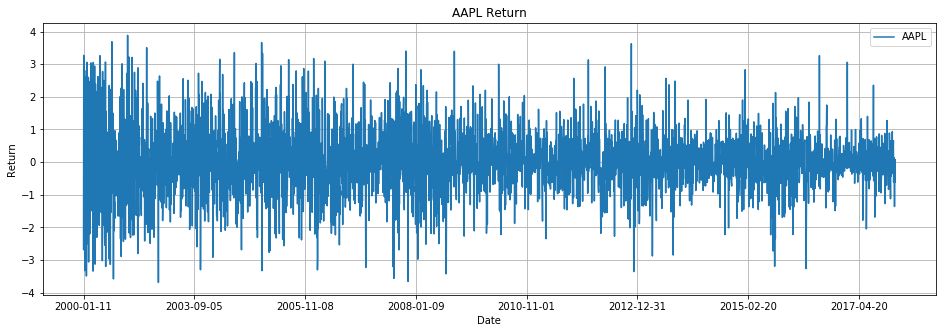

In [94]:
# Visualizing Log Returns for the DJIA 
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
scaled_djia_returns.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

The portfolio is divided into train and test split to perform the analysis regarding the best porfolio and backtesting shown later. 

In [98]:
# Dividing the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test = train_test_split(scaled_djia_returns, test_size=0.2)
X_unscaled_train, X_unscaled_test = train_test_split(djia_returns, test_size=0.2)


In [129]:
stock_tickers = scaled_djia_returns.columns.values
n_tickers = len(stock_tickers)

In [99]:
print(scaled_djia_returns.shape)
print(X_scaled_train.shape)
print(X_scaled_test.shape)

(3665, 28)
(2932, 28)
(733, 28)


<a id='4.2'></a>
## 5.2. Model Evaluation- Applying Principle Component Analysis

As this step, we create a function to compute principle component analysis from sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

In [100]:
# Train a PCA model
from sklearn.decomposition import PCA

pca_model = PCA()
pca_model.fit(X_scaled_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
# First Principal Component /Eigenvector
pca_model.components_[0]


array([-0.22843401, -0.22109687, -0.14762035, -0.19268007, -0.20399153,
       -0.18365844, -0.1932437 , -0.16777553, -0.19969953, -0.19427955,
       -0.20741147, -0.19714071, -0.20299489, -0.19603272, -0.17156912,
       -0.22243395, -0.14942306, -0.17463927, -0.19875482, -0.17093115,
       -0.19371974, -0.17290153, -0.19705188, -0.22363166, -0.13742721,
       -0.16830733, -0.17254842, -0.16226064])

The first (and in fact all) component has 28 dimensions. It is the first element of the basis that best describes the data. 

<a id='4.2.1'></a>
## 5.2.1.Explained Variance using PCA

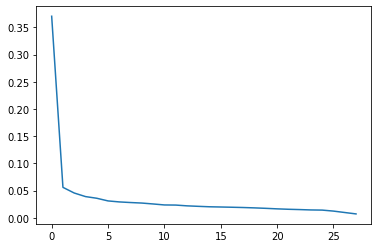

In [114]:
# plot explained variance

explained_variances = pd.Series(pca_model.explained_variance_ratio_)
explained_variances.plot()


Most of the variance is explained by the first component. This is seen as the market factor.

In [120]:
explained_variances.cumsum()[10]

0.7124587372955415

The first 10 principal components account for about 71.2% of the variance in the data set. 

<a id='4.2.2'></a>
## 5.2.2.Looking at Portfolio weights

We compute several functions to determine the weights of each principle component. We then visualize a scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principle component.

In [122]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca_model.components_)):
        weights["weights_{}".format(i)] = pca_model.components_[i] / sum(pca_model.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [124]:
# plot first five eigen portfolio
weights[0]

array([0.04349749, 0.04210038, 0.02810928, 0.03668937, 0.03884325,
       0.03497151, 0.0367967 , 0.03194715, 0.03802599, 0.03699394,
       0.03949446, 0.03753875, 0.03865348, 0.03732777, 0.03266951,
       0.04235499, 0.02845254, 0.03325411, 0.0378461 , 0.03254803,
       0.03688734, 0.03292322, 0.03752183, 0.04258305, 0.02616834,
       0.03204841, 0.03285598, 0.03089702])

<a id='4.2.3'></a>
## 5.2.3. Finding the Best Eigen Portfolio

In order to find the best eigen portfolios and perform backtesting in the next step, we use the sharpe ratio, which is a performance
metric that explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and/or lower volatility for the specified portfolio. The annualized sharpe ratio is computed by dividing
the annualized returns against the annualized volatility. For annualized return we
apply the geometric average of all the returns in respect to the periods per year (days
of operations in the exchange in a year). Annualized volatility is computed by taking the standard deviation of the returns and multiplying it by the square root of the peri‐
ods per year.

In [125]:
# Calculate sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a single eigen portfolio.
    '''
    n_years = ts_returns.shape[0] / periods_per_year
    annualised_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualised_volatility = ts_returns.std() * np.sqrt(periods_per_year)
    annualised_sharpe = annualised_return / annualised_volatility
    return annualised_return, annualised_volatility, annualised_sharpe



We construct a loop to compute the principle component’s weights for each eigen
portfolio, which then uses the sharpe ratio function to look for the portfolio with the
highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we
can visualize its performance against the DJIA Index for comparison.

Eigen portfolio #17 with the highest Sharpe. Return inf%, vol = 7383.96%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
       Return     Vol      Sharpe
17        inf  73.840  1.798e+308
22  3.896e+10  30.832   1.264e+09
0   1.049e-01   0.128   8.180e-01
21  3.674e-03   1.356   2.710e-03
25 -1.000e+00  16.048  -6.231e-02
12 -1.000e+00   9.888  -1.011e-01
10 -7.853e-02   0.721  -1.090e-01
13 -1.000e+00   6.011  -1.664e-01
1  -1.404e-01   0.826  -1.700e-01
9  -1.000e+00   5.001  -2.000e-01
18 -1.000e+00   4.875  -2.051e-01
3  -1.968e-01   0.843  -2.335e-01
24 -9.999e-01   4.157  -2.406e-01
5  -2.354e-01   0.815  -2.888e-01
7  -2.041e-01   0.675  -3.023e-01
19 -9.886e-01   2.846  -3.473e-01
27 -9.915e-01   2.785  -3.

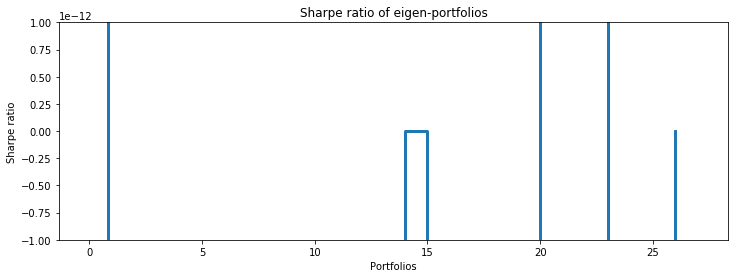

In [127]:
def optimizedPortfolio():
    n_portfolios = len(pca_model.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = scaled_djia_returns.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca_model.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_unscaled_train.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_unscaled_train.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


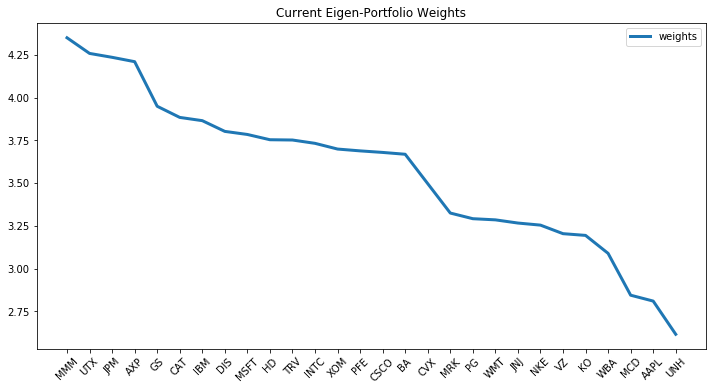

,weights
MMM,4.350
UTX,4.258
JPM,4.235
AXP,4.210
GS,3.949
CAT,3.884
IBM,3.865
DIS,3.803
MSFT,3.785
HD,3.754


In [130]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

The chart shows the allocation of the best portfolio. The weights in the chart are in
percentages. 

<a id='4.2.4'></a>
## 5.2.4. Backtesting Eigenportfolio

We will now try to backtest this algorithm on the test set, by looking at few top and bottom portfolios.

Current Eigen-Portfolio:
Return = -41.82%
Volatility = 65.24%
Sharpe = -0.64


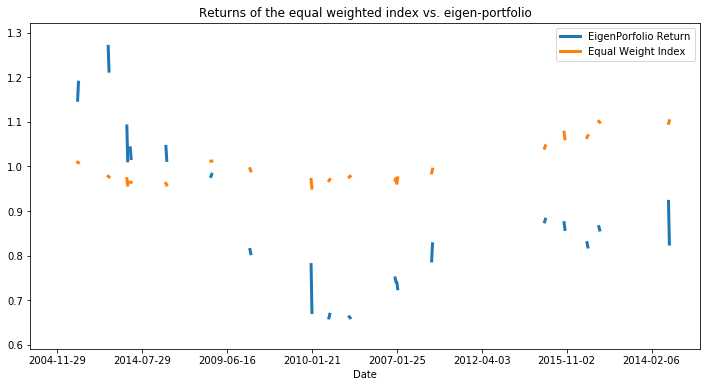

Current Eigen-Portfolio:
Return = 46.83%
Volatility = 77.92%
Sharpe = 0.60


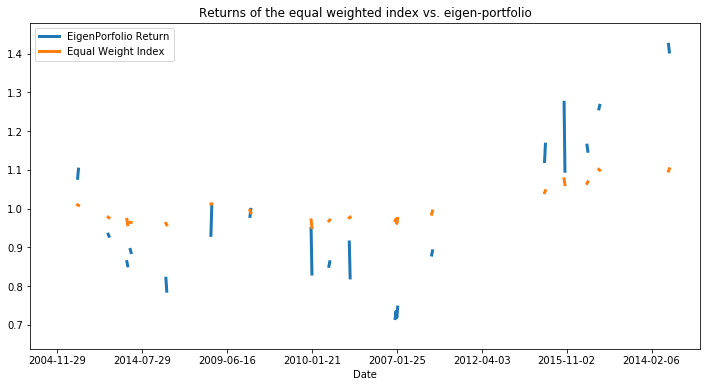

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 2447.53%
Sharpe = -0.04


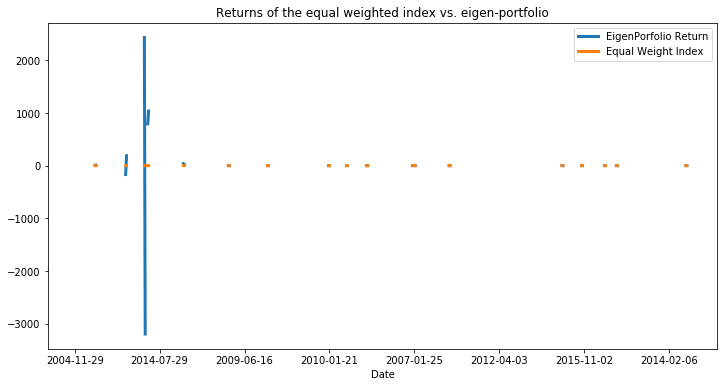

In [131]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_unscaled_test.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_unscaled_test.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_unscaled_test * (1/len(pca_model.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[7])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

As shown in charts above the eigen portfolio return of the top portfolios outperform
the equally weighted portfolio and the eigen portfolio ranked 19 underperformed the
market significantly in the test set. 

__Conclusion__

In terms of the intuition behind the eigen portfolios, we demonstrated that the first
eigen portfolio represents a systematic risk factor and other eigen portfolio may represent sector or industry factor. We discuss diversification benefits offered by the eigen
portfolios as they are derived using PCA and are independent.


Looking at the backtesting result, the portfolio with the best result in the training set
leads to the best result in the test set. By using PCA, we get independent eigen portfo‐
lios with higher return and sharp ratio as compared to market.
